In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


**Exploratory Data Analysis**

In [4]:
#  Indicates the rows and columns ofDataFrame!
df.shape

(11162, 17)

In [5]:
# to retrieve the column labels of a DataFrame
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
# descriptive statistics of the data frame (columns with data type 'object')
print(df.describe(include=['object']))

               job  marital  education default housing   loan   contact  \
count        11162    11162      11162   11162   11162  11162     11162   
unique          12        3          4       2       2      2         3   
top     management  married  secondary      no      no     no  cellular   
freq          2566     6351       5476   10994    5881   9702      8042   

        month poutcome deposit  
count   11162    11162   11162  
unique     12        4       2  
top       may  unknown      no  
freq     2824     8326    5873  


In [8]:
# descriptive statistics of the data frame (columns with data type 'int64')
print(df.describe(include=['int64']))

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum().sum()

0

In [11]:
# gives insights of the distribution of values for each feature in your DataFrame
features=["age","job","marital","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","deposit"]
for i in features:
    print(df[i].value_counts(),i)
    print('='*100)
    

31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: age, Length: 76, dtype: int64 age
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64 job
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64 marital
no     10994
yes      168
Name: default, dtype: int64 default
 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
 5517      1
 8332      1
 4859      1
-267       1
-134       1
Name: balance, Length: 3805, dtype: int64 balance
no     5881
yes    5281
Name: housing, dtype: int64 housing
no     9702
yes    1460
Name: loan, dtype: int64 loan
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64 contact
20    570
18

**VISUALIZATION**
&
**INSIGHTS**

In [12]:
# Numerical features
numerical_features = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

# Categorical features
categorical_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]

# target_variable
target_variable=['deposit']

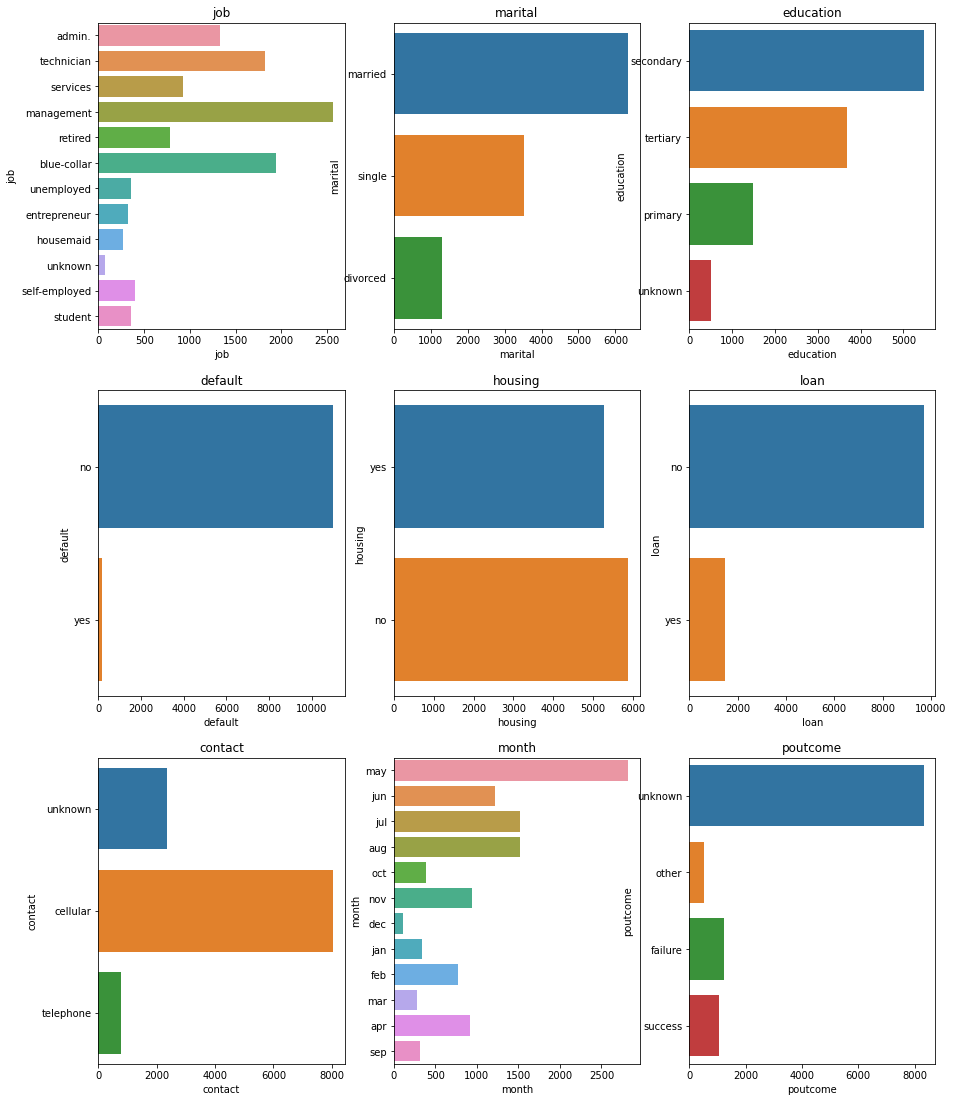

In [13]:
plt.figure(figsize=(15,80))
plotnumber=1
for i in categorical_features: #iterates through each categorical feature
    ax = plt.subplot(12,3,plotnumber) #creates a separate count plot for each.
    sns.countplot(y=i,data=df)
    plt.xlabel(i)
    plt.title(i)
    plotnumber+=1
plt.show()
# Each plot shows the distribution of the "deposit" variable within that specific category of the chosen feature.

**Categorical Features and Label**

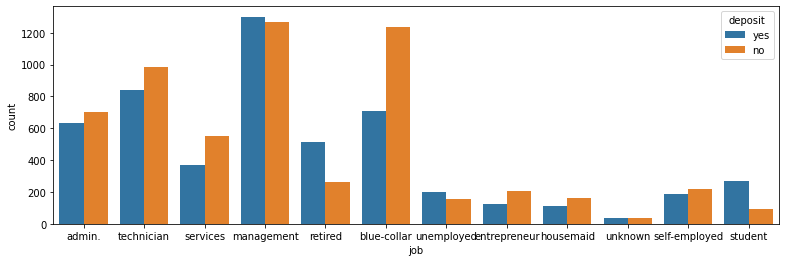

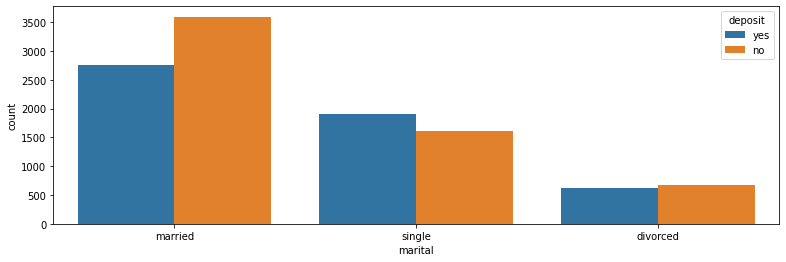

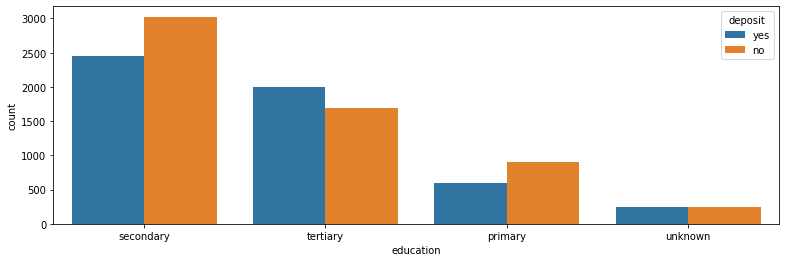

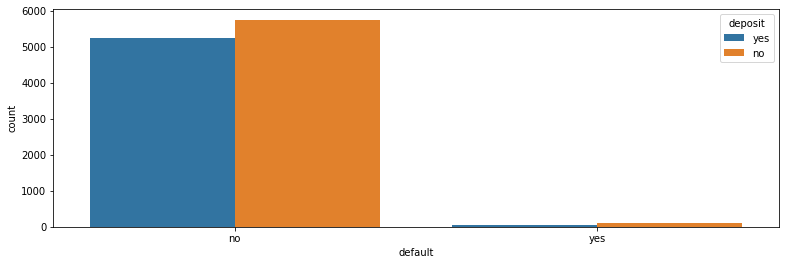

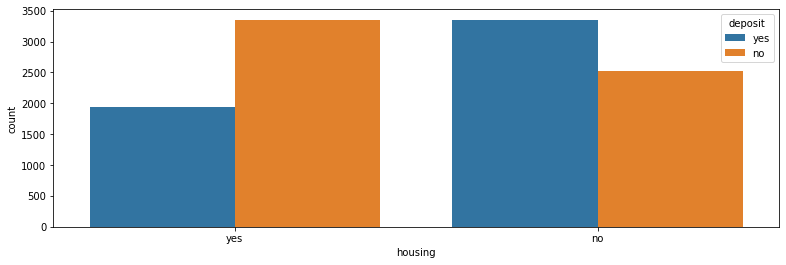

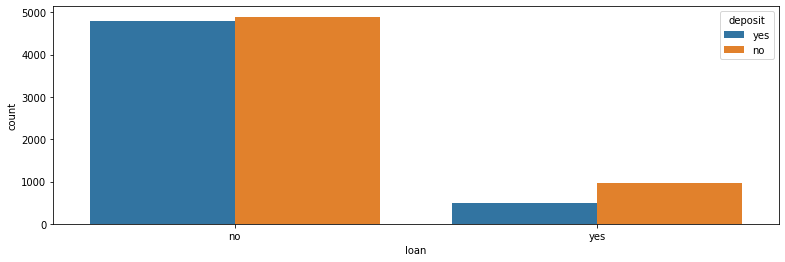

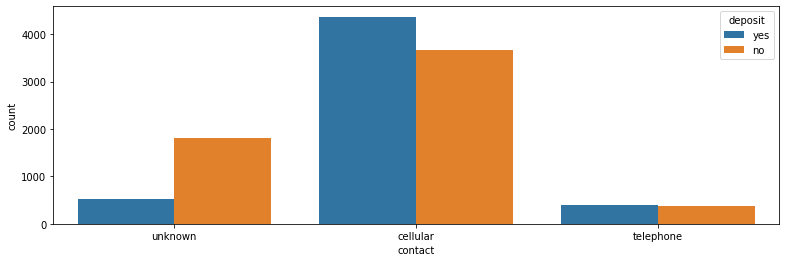

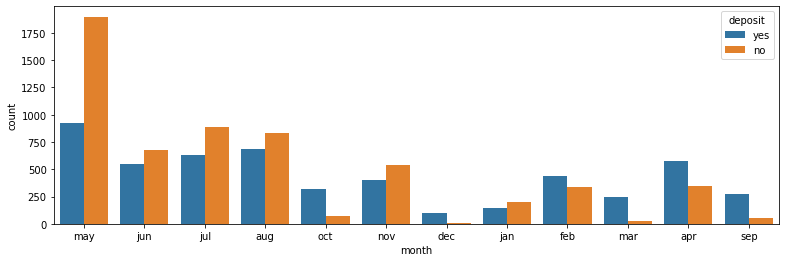

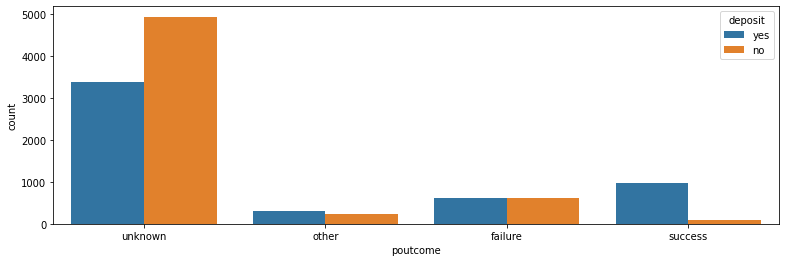

In [14]:
for feature in categorical_features: #iterates over each categorical feature in the categorical_features list
    plt.figure(figsize=(13,4))
    sns.countplot(x=feature, hue="deposit", data= df) #hue parameter separates the counts by the "deposit"
    plt.show()

**Numerical Features**

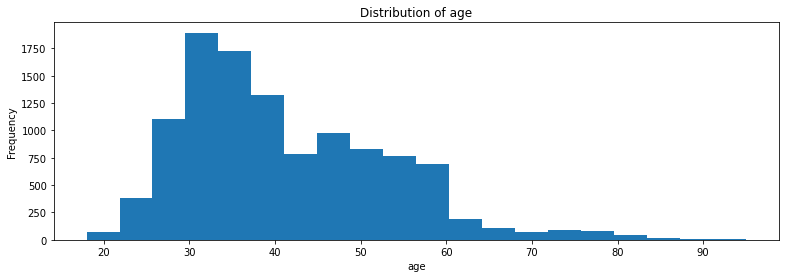

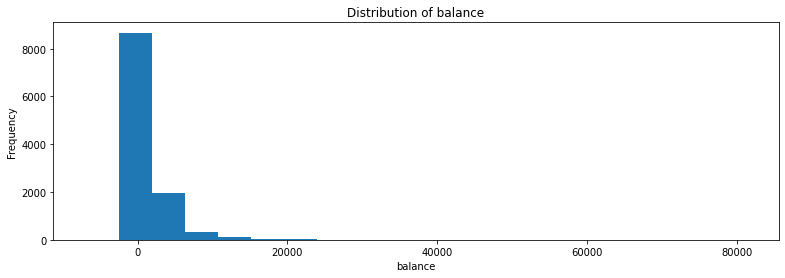

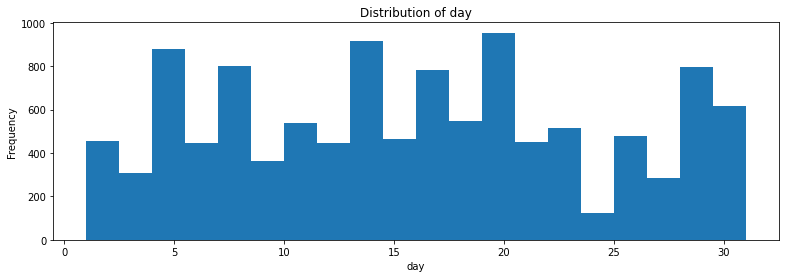

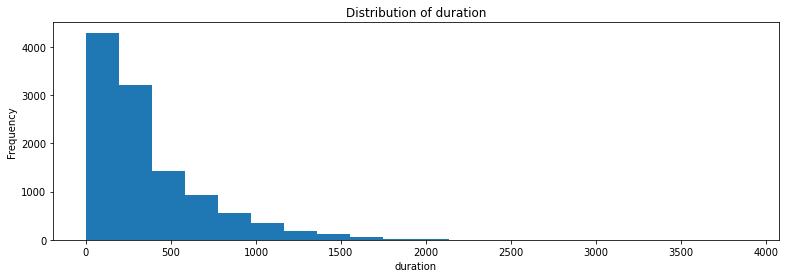

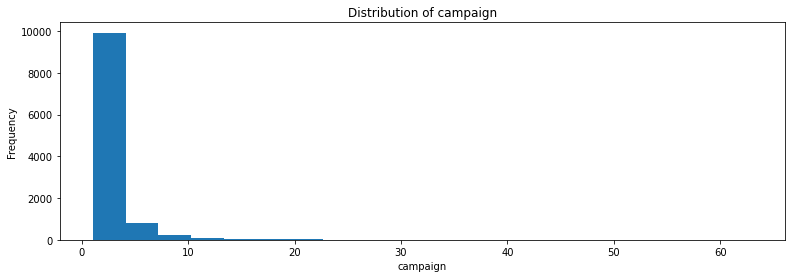

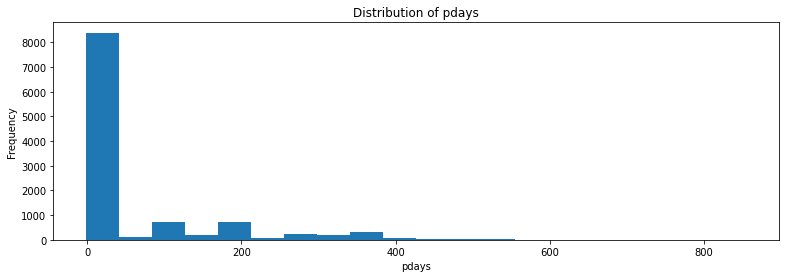

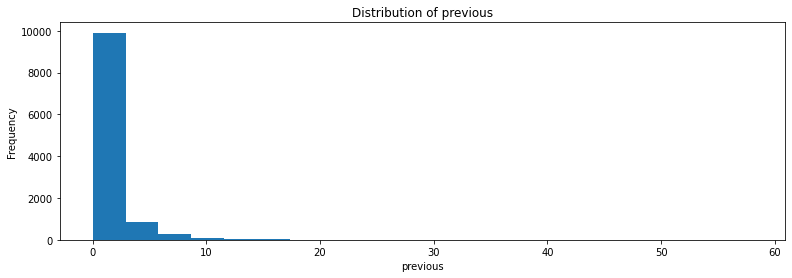

In [15]:
for i in numerical_features:
    plt.figure(figsize=(13,4))
    plt.hist(df[i], bins=20) # bins=20 argument specifies that the histogram should be divided into 20 bins
    plt.title('Distribution of ' +i)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

**Bar Plots**
comparing each numerical feature against the deposit

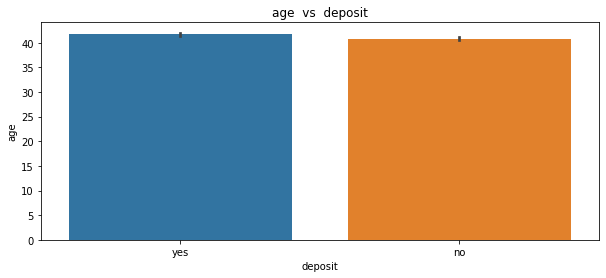

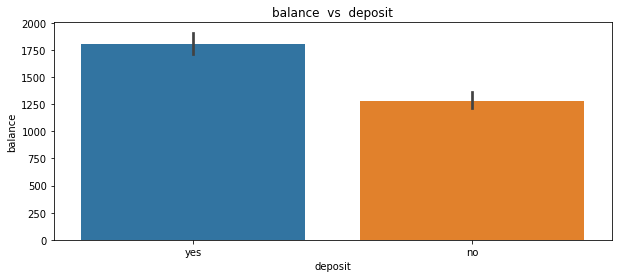

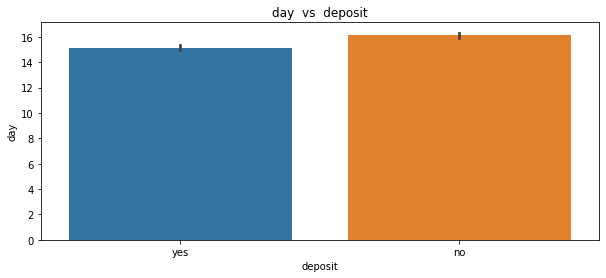

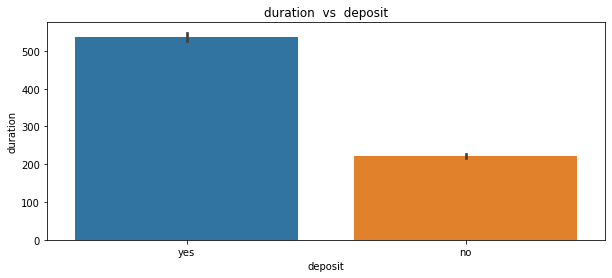

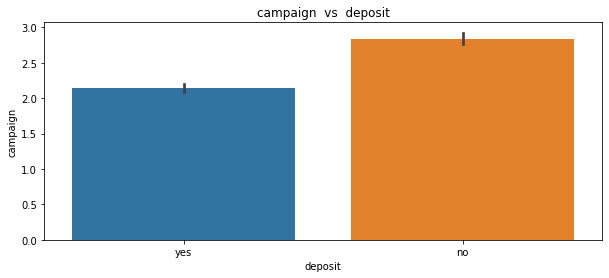

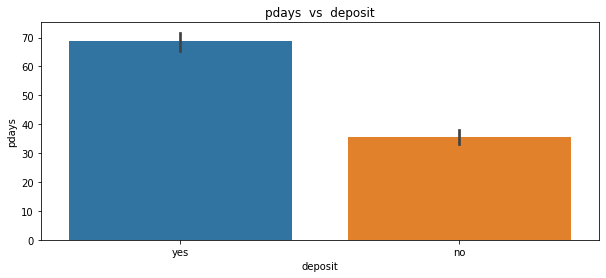

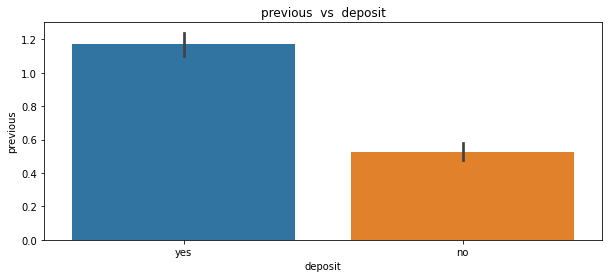

In [16]:
for i in numerical_features:
    plt.figure(figsize=(10,4))
    sns.barplot(x='deposit', y=i, data=df)
    plt.title(i+ '  vs  deposit')
    plt.show()

**Heatmmap**
Correlation

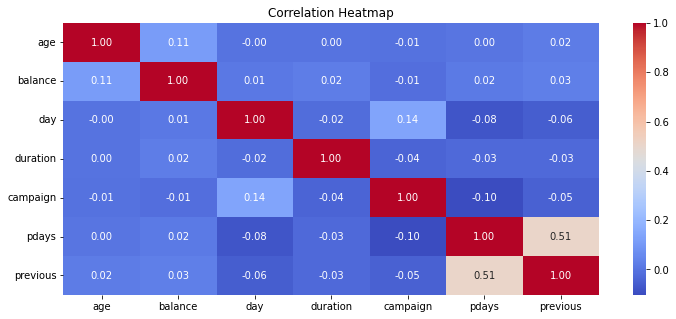

In [17]:
numerical_df=df[numerical_features]
correlation_matrix= numerical_df.corr()
plt.figure(figsize=(12,5))
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**BOX PLOT**

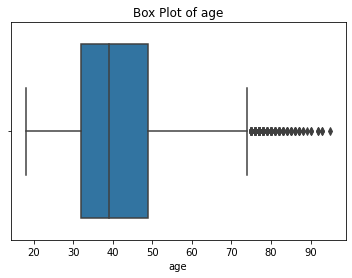

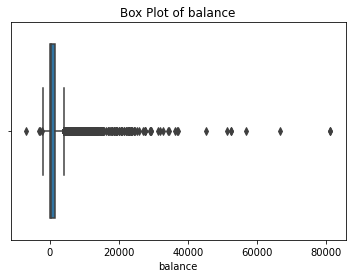

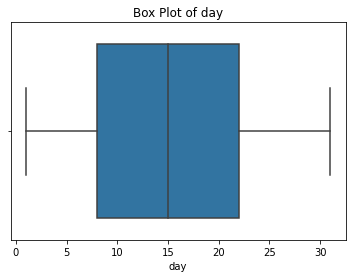

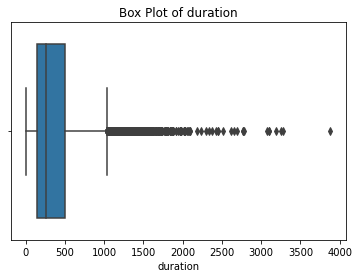

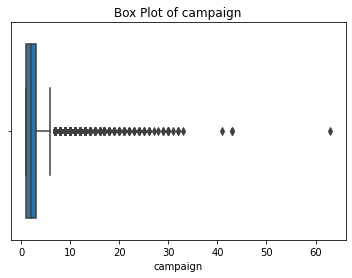

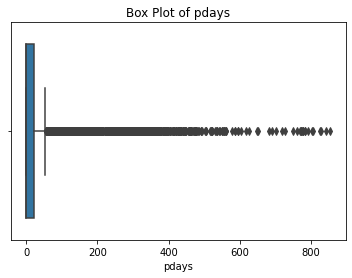

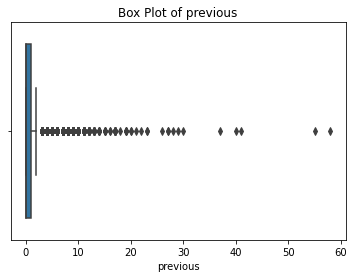

In [18]:
for i in numerical_features:
    sns.boxplot (data= df, x=i)
    plt.xlabel(i)
    plt.title('Box Plot of '+i)
    # plt.grid(False)
    plt.show()

Count of each feartures

In [19]:
df['default'].groupby(df['default']).count()

default
no     10994
yes      168
Name: default, dtype: int64

In [20]:
df['pdays'].groupby(df['pdays']).count()

pdays
-1      8324
 1         8
 2         8
 4         1
 5         2
        ... 
 805       1
 826       1
 828       1
 842       1
 854       1
Name: pdays, Length: 472, dtype: int64

In [21]:
# * defaut features does not play imp role

# removes the 'default' column from the DataFrame 
df.drop(['default'],axis=1, inplace=True)

In [22]:
df.drop(['pdays'],axis=1, inplace=True)

In [23]:
# groups the'deposit' and 'balance' and then counts the occurrences
df.groupby(['deposit','balance'])['balance'].count()

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [24]:
df.groupby(['deposit', 'duration'])['duration'].count()

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

In [25]:
df.groupby(['deposit', 'campaign'])['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [26]:
df.groupby(['deposit','previous'])['previous'].count()

deposit  previous
no       0           4940
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

Removing Outliers
method:IQR

In [27]:
def rem_outliers(df, column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3-1.5*IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
# column with outliers
outlier_columns=['campaign', 'previous']

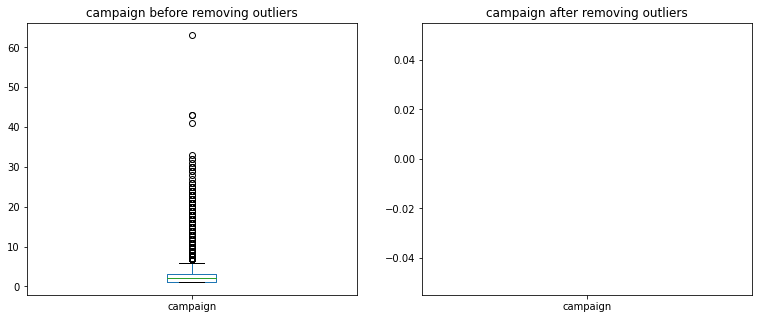

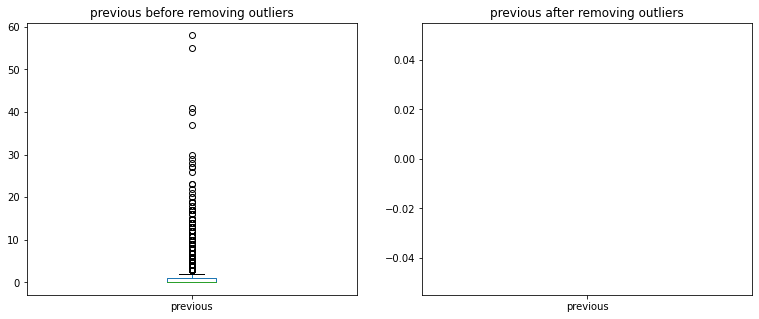

In [28]:
# before and after outliers: boxplot
for col in outlier_columns:
    plt.figure(figsize=(13,5))

    # boxplot before removing outlier
    plt.subplot(1,2,1)
    df.boxplot(column=col)
    plt.title(col+' before removing outliers')
    plt.grid(False)

    # boxplot after removing outliers
    plt.subplot(1,2,2)
    rem_outliers(df, col).boxplot(column=col)  # Using rem_outliers function to remove outliers
    plt.title(col+ ' after removing outliers')
    plt.grid(False)
plt.show()


In [29]:
for col in outlier_columns:
    print("Before removing outliers:")
    print(df[col].describe())
    print("")

    print("After removing outliers:")
    cleaned_df = rem_outliers(df, col)
    print(cleaned_df[col].describe())
    print("")


Before removing outliers:
count    11162.000000
mean         2.508421
std          2.722077
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

After removing outliers:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: campaign, dtype: float64

Before removing outliers:
count    11162.000000
mean         0.832557
std          2.292007
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         58.000000
Name: previous, dtype: float64

After removing outliers:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: previous, dtype: float64



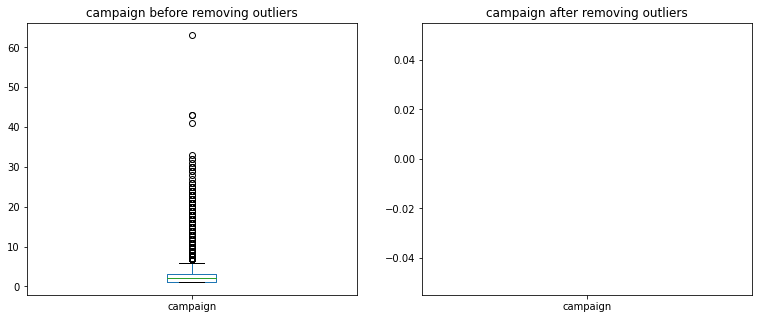

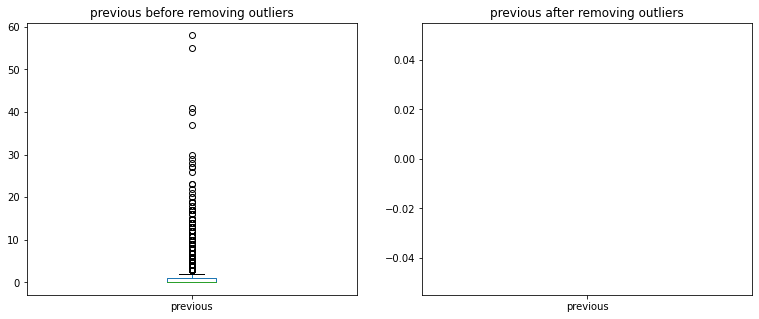

In [30]:
for col in outlier_columns:
    plt.figure(figsize=(13, 5))

    # boxplot before removing outlier
    plt.subplot(1, 2, 1)
    df.boxplot(column=col)
    plt.title(col + ' before removing outliers')
    plt.grid(False)

    # boxplot after removing outliers
    plt.subplot(1, 2, 2)
    cleaned_df.boxplot(column=col)
    plt.title(col + ' after removing outliers')
    plt.grid(False)
plt.show()


.                              **FEATURE SELECTION**

In [31]:
features = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous', 'poutcome']
x = df[features]
y = df['deposit']

In [32]:
x

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,0,unknown
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,0,unknown
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,0,unknown
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,0,unknown
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,no,cellular,20,apr,257,1,0,unknown
11158,39,services,married,secondary,733,no,no,unknown,16,jun,83,4,0,unknown
11159,32,technician,single,secondary,29,no,no,cellular,19,aug,156,2,0,unknown
11160,43,technician,married,secondary,0,no,yes,cellular,8,may,9,2,5,failure


In [33]:
y

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

**Feature Scaling & Handling**
CATEGORICAL DATA

In [34]:
numerical_features = ['age','balance','day','duration','campaign','previous']
categorical_features = ['job','marital','education','housing','loan','contact','month','poutcome']

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [36]:
# OneHotEncoder converts categorical features into one-hot encoded vectors, where each category is represented as a binary feature
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])
# enc = OneHotEncoder(sparse=False)

In [37]:
# columnTransformer
preprocessor = ColumnTransformer(
    transformers=[ ('num', numeric_transformer, numerical_features), ('cat', categorical_transformer, categorical_features)]
)

In [38]:
x_preprocessed = preprocessor.fit_transform(x).toarray()


**SPLITTING DATA**
TRAINIG AND TESTING SET

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_preprocessed, y, test_size=0.25, random_state=42)

In [40]:
x_train.shape

(8371, 48)

In [41]:
x_train

array([[ 1.57544795,  2.04400371,  0.278131  , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.81996031, -0.49097877, -0.55318714, ...,  0.        ,
         0.        ,  0.        ],
       [-1.11073033, -0.79699977, -1.14698582, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.52312883, -0.11922681,  0.51565047, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.81996031, -0.24262738,  1.10944915, ...,  0.        ,
         0.        ,  1.        ],
       [-0.94284418, -0.47330582,  0.87192968, ...,  0.        ,
         0.        ,  1.        ]])

In [42]:
x_test.shape

(2791, 48)

.                         **//** **//** **//** **//** **//**
.                                  **MODEL SELECTION**
.                         **//** **//** **//** **//** **//**

1. **Support Vector Machienes**

In [43]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC()

In [44]:
y_pred = svm_model.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# print("Accuracy: ", accuracy_score,(y_test, y_pred))
# print('Classification: \n', classification_report(y_test,y_pred))
# print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8434252955929774


In [47]:
print('Classification: \n', classification_report(y_test,y_pred))

Classification: 
               precision    recall  f1-score   support

          no       0.87      0.83      0.85      1450
         yes       0.82      0.86      0.84      1341

    accuracy                           0.84      2791
   macro avg       0.84      0.84      0.84      2791
weighted avg       0.84      0.84      0.84      2791



In [48]:
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[1200  250]
 [ 187 1154]]


In [49]:
trainig_score = svm_model.score(x_test,y_test)
trainig_score

0.8434252955929774

In [50]:
test_score = svm_model.score(x_test,y_test)
test_score

0.8434252955929774